### Remove the Features that are highly correlated

##### if independent features are highly correlated with dependent feature we will not remove them
##### we check correlation between independent features, supp 3 independent features are highly correlated with eachother then they behave like duplicates, we keep only one of them.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('diabetes.csv') ## dataset with nostring entries is required
df.shape

(768, 9)

In [11]:
X = df.drop(labels = ['Outcome'],  axis =1) # expect  TARGET , all are the independent features 
Y = df['Outcome']

In [12]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Train test

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size= 0.2, random_state= 0)

In [16]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [17]:
import seaborn as sns
#Using Pearson Correlation
cor = X_train.corr()

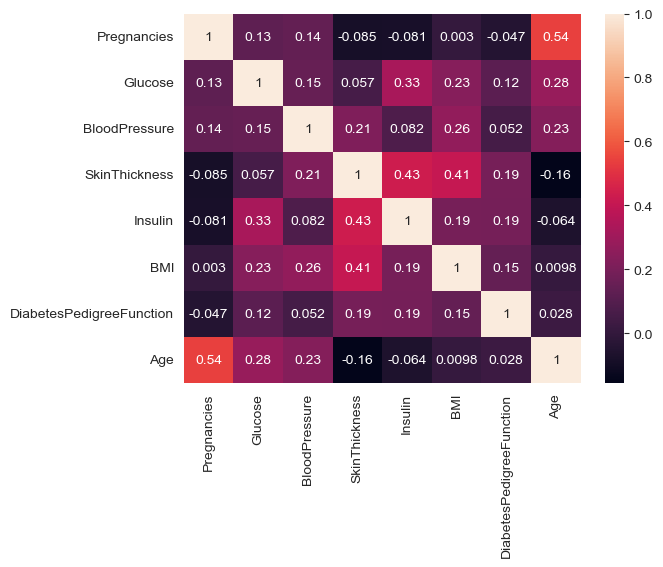

In [24]:
sns.heatmap(cor, annot= True)
plt.show()

###### With the following function we can select highly correlated features, it will remove first feature that is highly correlated

In [19]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:# use abs() to get -ve correlated features also
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [20]:
corr_features = correlation(X_train, 0.4)# 40%, mostly 70% or 80% features selected 
len(set(corr_features))

3

In [21]:
corr_features

{'Age', 'BMI', 'Insulin'}

In [22]:
X_train = X_train.drop(corr_features, axis =1)

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
603,7,150,78,29,0.692
118,4,97,60,23,0.443
247,0,165,90,33,0.427
157,1,109,56,21,0.833
468,8,120,0,0,0.183
...,...,...,...,...,...
763,10,101,76,48,0.171
192,7,159,66,0,0.383
629,4,94,65,22,0.148
559,11,85,74,0,0.300
